In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [12]:
df = pd.read_csv('/Users/dmitrykorzhov/Desktop/Root/projects/oura_ai/backend/oura_2024-04-16_2024-06-16_trends.csv')


df.columns

Index(['date', 'Sleep Score', 'Total Sleep Score', 'REM Sleep Score',
       'Deep Sleep Score', 'Sleep Efficiency Score', 'Restfulness Score',
       'Sleep Latency Score', 'Sleep Timin Score', 'Total Sleep Duration',
       'Total Bedtime ', 'Awake Time', 'REM Sleep Duration',
       'Light Sleep Duration', 'Deep Sleep Duration', 'Restless Sleep',
       'Sleep Efficiency', 'Sleep Latency', 'Sleep Timing', 'Bedtime Start',
       'Bedtime End', 'Average Resting Heart Rate',
       'Lowest Resting Heart Rate', 'Average HRV',
       'Temperature Deviation (°C)', 'Temperature Trend Deviation',
       'Respiratory Rate', 'Activity Score', 'Stay Active Score',
       'Move Every Hour Score', 'Meet Daily Targets Score',
       'Training Frequency Score', 'Training Volume Score', 'Activity Burn',
       'Total Burn', 'Steps', 'Equivalent Walking Distance', 'Inactive Time',
       'Rest Time', 'Low Activity Time', 'Medium Activity Time',
       'High Activity Time', 'Non-wear Time', 'Average

In [7]:
df['Total Sleep Duration'] = df['Total Sleep Duration'] / 3600

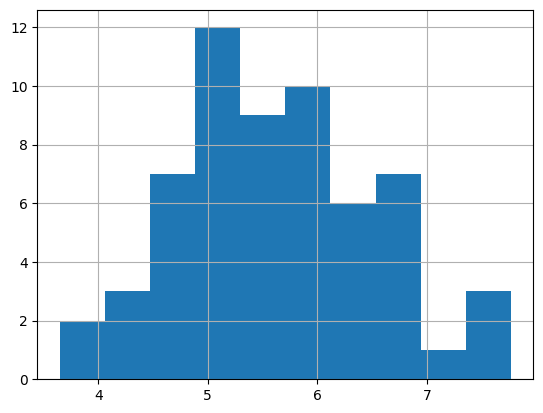

In [9]:
df['Total Sleep Duration']

plt.figure()
df['Total Sleep Duration'].hist()
plt.show()

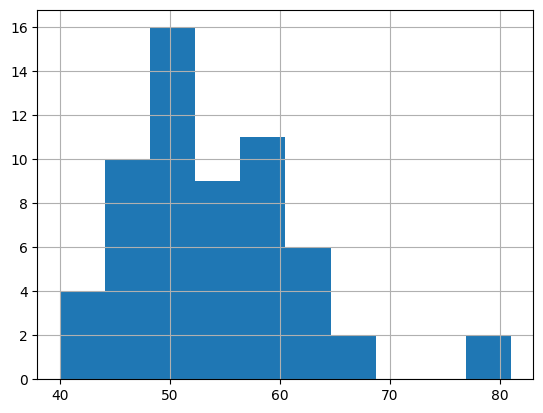

In [16]:
df['Sleep Score'] 

plt.figure()
df['Sleep Score'].hist()
plt.show()

In [22]:
df_numeric = df.select_dtypes(include=[np.number])

df_numeric.columns

Index(['Sleep Score', 'Total Sleep Score', 'REM Sleep Score',
       'Deep Sleep Score', 'Sleep Efficiency Score', 'Restfulness Score',
       'Sleep Latency Score', 'Sleep Timin Score', 'Total Sleep Duration',
       'Total Bedtime ', 'Awake Time', 'REM Sleep Duration',
       'Light Sleep Duration', 'Deep Sleep Duration', 'Restless Sleep',
       'Sleep Efficiency', 'Sleep Latency', 'Sleep Timing',
       'Average Resting Heart Rate', 'Lowest Resting Heart Rate',
       'Average HRV', 'Temperature Deviation (°C)',
       'Temperature Trend Deviation', 'Respiratory Rate', 'Activity Score',
       'Stay Active Score', 'Move Every Hour Score',
       'Meet Daily Targets Score', 'Training Frequency Score',
       'Training Volume Score', 'Activity Burn', 'Total Burn', 'Steps',
       'Equivalent Walking Distance', 'Inactive Time', 'Rest Time',
       'Low Activity Time', 'Medium Activity Time', 'High Activity Time',
       'Non-wear Time', 'Average MET', 'Long Periods of Inactivity',
   

In [23]:
correlation_matrix = df_numeric.corr()
sleep_score_correlation = correlation_matrix['Sleep Score']
sorted_correlations = sleep_score_correlation.sort_values(ascending=False)

In [24]:
sorted_correlations

Sleep Score                    1.000000
Previous Night Score           0.999648
Total Sleep Score              0.884100
Total Sleep Duration           0.752950
Sleep Timing                   0.700576
Deep Sleep Score               0.648491
Sleep Timin Score              0.589312
Restless Sleep                 0.579636
Sleep Balance Score            0.576709
REM Sleep Score                0.565196
Total Bedtime                  0.544649
Rest Time                      0.524496
Deep Sleep Duration            0.501970
Light Sleep Duration           0.497119
Medium Activity Time           0.469612
REM Sleep Duration             0.463898
Stay Active Score              0.454296
Readiness Score                0.418651
Temperature Deviation (°C)     0.417101
Recovery Index Score           0.352164
Steps                          0.252489
Lowest Resting Heart Rate      0.246272
Average Resting Heart Rate     0.244603
Restfulness Score              0.234218
Sleep Latency Score            0.219703


In [25]:
correlation_matrix = df_numeric.corr()
sleep_score_correlation = correlation_matrix['Deep Sleep Score']
sorted_correlations = sleep_score_correlation.sort_values(ascending=False)

In [26]:
sorted_correlations

Deep Sleep Score               1.000000
Deep Sleep Duration            0.938598
Previous Night Score           0.651263
Sleep Score                    0.648491
Total Sleep Score              0.607085
Rest Time                      0.565313
Sleep Timing                   0.533931
Total Sleep Duration           0.522873
Total Bedtime                  0.522170
Sleep Balance Score            0.491460
Awake Time                     0.401612
Temperature Deviation (°C)     0.401505
Respiratory Rate               0.398112
Average Resting Heart Rate     0.390347
Stay Active Score              0.361065
Restless Sleep                 0.350884
Recovery Index Score           0.321952
REM Sleep Score                0.308376
Activity Balance Score         0.289157
Sleep Timin Score              0.288499
Medium Activity Time           0.287732
Lowest Resting Heart Rate      0.271586
Readiness Score                0.259658
REM Sleep Duration             0.253643
Activity Score                 0.179257


In [38]:
X = df_numeric.drop('Total Sleep Score', axis = 1)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

y = df_numeric['Total Sleep Score']
y = imputer.fit_transform(y.values.reshape(-1,1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [40]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [41]:
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': df_numeric.columns.drop('Total Sleep Score'),
    'Importance': feature_importances
})
print(importance_df.sort_values(by='Importance', ascending=False))

                        Feature  Importance
7          Total Sleep Duration    0.568348
16                 Sleep Timing    0.272687
8                Total Bedtime     0.021766
22             Respiratory Rate    0.017169
42         Previous Night Score    0.014239
0                   Sleep Score    0.013940
13               Restless Sleep    0.010815
11         Light Sleep Duration    0.010813
19                  Average HRV    0.006860
43          Sleep Balance Score    0.006481
2              Deep Sleep Score    0.006173
34                    Rest Time    0.006045
47     Resting Heart Rate Score    0.003832
10           REM Sleep Duration    0.003346
48            HRV Balance Score    0.003094
5           Sleep Latency Score    0.002851
23               Activity Score    0.002693
20   Temperature Deviation (°C)    0.002658
36         Medium Activity Time    0.002531
41              Readiness Score    0.001823
33                Inactive Time    0.001757
6             Sleep Timin Score 

In [42]:
X = df_numeric.drop('Total Sleep Duration', axis = 1)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

y = df_numeric['Total Sleep Duration']
y = imputer.fit_transform(y.values.reshape(-1,1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': df_numeric.columns.drop('Total Sleep Score'),
    'Importance': feature_importances
})
print(importance_df.sort_values(by='Importance', ascending=False))

                        Feature  Importance
1               REM Sleep Score    0.671334
16                 Sleep Timing    0.207302
8                Total Bedtime     0.040471
0                   Sleep Score    0.009102
42         Previous Night Score    0.007612
11         Light Sleep Duration    0.006983
13               Restless Sleep    0.004567
22             Respiratory Rate    0.004148
48            HRV Balance Score    0.003955
34                    Rest Time    0.003675
20   Temperature Deviation (°C)    0.003099
36         Medium Activity Time    0.002771
23               Activity Score    0.002640
15                Sleep Latency    0.002307
49         Recovery Index Score    0.001961
41              Readiness Score    0.001831
5           Sleep Latency Score    0.001628
19                  Average HRV    0.001575
10           REM Sleep Duration    0.001433
21  Temperature Trend Deviation    0.001425
24            Stay Active Score    0.001387
38                Non-wear Time 